# load objectives comparison results

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import argparse
from glob import glob

rdir = '../results_objectives/'
frames = []
# load regression results
for f in glob(rdir + '*/*R.csv'):
        
    df = pd.read_csv(f,sep='\t',index_col=None)

#     print(f)
    if 'FeatJustCorr' in f:
        continue
    alg = df.algorithm.unique()
    if len(alg)>0:
        if 'XGB' in df['algorithm'][0]: 
            df['method'] = 'XGB'
        else:
            df['method'] = df['algorithm']
    df['median_score'] = df['score'].median()
    df['dataset'] = f.split('/')[-2]
    
    frames.append(df)
df_obj = pd.concat(frames)


print(len(df_obj), 'results')

print(df_obj.columns)
print(len(df_obj['dataset'].unique()),'datasets')
print('methods:',df_obj.method.unique())
print('unique seeds:',len(df_obj.seed.unique()))
print('dataset results',df_obj.groupby(['method']).count().reset_index())
# look at summaries
counts={}
methods = df_obj.method.unique()
for d,df_d in df_obj.groupby('dataset'):
    counts[d] = len(df_d['algorithm'].unique())
obj_cool_ds = [d for d in counts.keys() if counts[d]>=len(methods)]
obj_not_cool_ds = [d for d in counts.keys() if counts[d]<len(methods)]
print(len(obj_cool_ds),'cool ds')
# filter datasets without results
df_obj = df_obj.loc[df_obj['dataset'].isin(obj_cool_ds)]
print('not cool ds:',notcool_ds)

print('methods:',df_obj.method.unique())
print('methods:',df_obj.algorithm.unique())
df_obj['score'] = df_obj['score'].astype(float)
df_obj['size'] = df_obj['size'].astype(float)

/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



4319 results
Index(['algorithm', 'cond', 'corr', 'dataset', 'median_score', 'method',
       'num_params', 'parameters', 'score', 'seed', 'size', 'time'],
      dtype='object')
117 datasets
methods: ['FeatCN' 'FeatCorr' 'Feat' 'KernelRidge' 'ElasticNet' 'MLP' 'RF' 'XGB']
unique seeds: 2681
dataset results         method  algorithm  cond  corr  dataset  median_score  num_params  \
0   ElasticNet        555   555   520      555           555         555   
1         Feat        551   551   535      551           551         551   
2       FeatCN        455   455   443      455           455         455   
3     FeatCorr        548   548   539      548           548         548   
4  KernelRidge        555   555   520      555           555         555   
5          MLP        530   530   502      530           530         530   
6           RF        585   585   585      585           585         585   
7          XGB        540   540   505      540           540         540   

   param

# load semantic variation operator results

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import matplotlib 
matplotlib.rc('pdf', fonttype=42)

import argparse
from glob import glob
rdir = '../results_variation/'
frames = []
# load regression results
for f in glob(rdir + '*/*R.csv'):
        
    df = pd.read_csv(f,sep='\t',index_col=None)

#     print(f)
    if 'FeatJustCorr' in f:
        continue
    alg = df.algorithm.unique()
    if len(alg)>0:
        if 'XGB' in df['algorithm'][0]: 
            df['method'] = 'XGB'
        else:
            df['method'] = df['algorithm']
#     df['method'] = f.split('Feat')[1].split('R.csv')[0]
    df['dataset'] = f.split('/')[-2]
    
    frames.append(df)
df_variation = pd.concat(frames)


# methods =['LexNSGA2','Lex','NSGA2','SimAnneal','MLP','ElasticNet',  'Random', 'RF', 'KernelRidge']
# df_variation = df_variation.loc[df_variation.method.isin(methods)]


print(len(df_variation), 'results')

print(df_variation.columns)
print(len(df_variation['dataset'].unique()),'datasets')
print('methods:',df_variation.method.unique())
print('unique seeds:',len(df_variation.seed.unique()))
print('dataset results',df_variation.groupby(['method']).count().reset_index())
# look at summaries
counts={}
methods = df_variation.method.unique()
for d,df_d in df_variation.groupby('dataset'):
    counts[d] = len(df_d['algorithm'].unique())
variation_cool_ds = [d for d in counts.keys() if counts[d]>=len(methods)]
variation_not_cool_ds = [d for d in counts.keys() if counts[d]<len(methods)]
print(len(variation_cool_ds),'cool ds')
# filter datasets without results
# df_variation = df_variation.loc[df_variation['dataset'].isin(cool_ds)]
print('not cool ds:',variation_not_cool_ds)

print('methods:',df_variation.method.unique())
print('methods:',df_variation.algorithm.unique())
# df_variation['score'] = df_variation['score'].astype(float)
df_variation['size'] = df_variation['size'].astype(float)

/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



3751 results
Index(['algorithm', 'cond', 'corr', 'dataset', 'method', 'mse_score',
       'num_params', 'parameters', 'r2_score', 'seed', 'size', 'time'],
      dtype='object')
112 datasets
methods: ['FeatResXO' 'FeatStageXO' 'Feat' 'ElasticNet' 'MLP' 'XGB']
unique seeds: 2145
dataset results         method  algorithm  cond  corr  dataset  mse_score  num_params  \
0   ElasticNet        554   554   519      554        554         554   
1         Feat        551   551   538      551        551         551   
2    FeatResXO        555   555   545      555        555         555   
3  FeatStageXO        550   550   537      550        550         550   
4          MLP        560   560   547      560        560         560   
5          XGB        981   981   931      981        981         981   

   parameters  r2_score  seed  size  time  
0         554       554   554   554   554  
1         551       551   551   551   551  
2         555       555   555   555   555  
3         550     

# load wawn benchmark results

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib
matplotlib.rc('pdf', fonttype=42)

%matplotlib inline
import argparse
from glob import glob
rdir = '../results_wawn/'

frames = []
# load regression results
for f in glob(rdir + '*/*R.csv'):
        
    df = pd.read_csv(f,sep='\t',index_col=None)

#     print(f)
    if 'FeatJustCorr' in f:
        continue
    alg = df.algorithm.unique()
    if len(alg)>0:
        if 'XGB' in df['algorithm'][0]: 
            df['method'] = 'XGB'
        else:
            df['method'] = df['algorithm']
#     df['method'] = f.split('Feat')[1].split('R.csv')[0]
    df['dataset'] = f.split('/')[-2]
    
    frames.append(df)
df_wawn = pd.concat(frames)


# methods =['LexNSGA2','Lex','NSGA2','SimAnneal','MLP','ElasticNet',  'Random', 'RF', 'KernelRidge']
# df_wawn = df_wawn.loc[df_wawn.method.isin(methods)]

print(len(df_wawn), 'results')

print(df_wawn.columns)
print(len(df_wawn['dataset'].unique()),'datasets')
print('methods:',df_wawn.method.unique())
print('unique seeds:',len(df_wawn.seed.unique()))
print('dataset results',df_wawn.groupby(['method']).count().reset_index())
# look at summaries
counts={}
methods = df_wawn.method.unique()
for d,df_d in df_wawn.groupby('dataset'):
    counts[d] = len(df_d['algorithm'].unique())
wawn_cool_ds = [d for d in counts.keys() if counts[d]>=len(methods)]
wawn_notcool_ds = [d for d in counts.keys() if counts[d]<len(methods)]
print(len(wawn_cool_ds),'wawn_cool ds')
# filter datasets without results
# df_wawn = df_wawn.loc[df_wawn['dataset'].isin(cool_ds)]
print('not wawn_cool ds:',wawn_notcool_ds)

print('methods:',df_wawn.method.unique())
print('methods:',df_wawn.algorithm.unique())
# df_wawn['score'] = df_wawn['score'].astype(float)
df_wawn['size'] = df_wawn['size'].astype(float)

/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



3330 results
Index(['algorithm', 'cond', 'corr', 'dataset', 'method', 'mse_score',
       'num_params', 'parameters', 'r2_score', 'seed', 'size', 'time'],
      dtype='object')
112 datasets
methods: ['FeatResXO' 'FeatStageXO' 'Feat']
unique seeds: 2122
dataset results         method  algorithm  cond  corr  dataset  mse_score  num_params  \
0         Feat       1110  1110  1079     1110       1110        1110   
1    FeatResXO       1111  1111  1079     1111       1111        1111   
2  FeatStageXO       1109  1109  1074     1109       1109        1109   

   parameters  r2_score  seed  size  time  
0        1110      1110  1110  1110  1110  
1        1111      1111  1111  1111  1111  
2        1109      1109  1109  1109  1109  
111 wawn_cool ds
not wawn_cool ds: ['1193_BNG_lowbwt']
methods: ['FeatResXO' 'FeatStageXO' 'Feat']
methods: ['FeatResXO' 'FeatStageXO' 'Feat']


# plot the properties of the datasets that were used for different analyses

Index(['did', 'MajorityClassSize', 'MaxNominalAttDistinctValues',
       'MinorityClassSize', 'NumberOfClasses', 'NumberOfFeatures',
       'NumberOfInstances', 'NumberOfInstancesWithMissingValues',
       'NumberOfMissingValues', 'NumberOfNumericFeatures',
       'NumberOfSymbolicFeatures', 'name', 'status'],
      dtype='object')


AttributeError: 'PathCollection' object has no property 'hue'

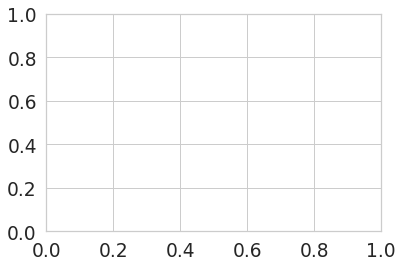

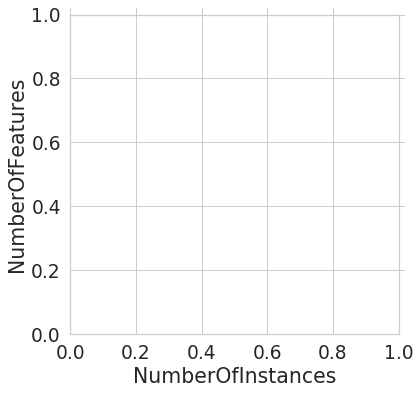

In [22]:
#plot of dataset properties
import matplotlib.pyplot as plt

df_data=pd.read_csv('Regression_datasets_pmlb.tsv', sep='\t')
print(df_data.columns)
vary_cool_ids = [d.split('_')[0] for d in variation_cool_ds]
obj_cool_ids = [d.split('_')[0] for d in obj_cool_ds]
wawn_cool_ids = [d.split('_')[0] for d in wawn_cool_ds]

df_data['source'] = df_data.did.apply(lambda x: 'WAWN' if x in wawn_cool_ids else 'Extension')
dataset_vary = df_data[df_data.did.isin(vary_cool_ids)]
dataset_obj = df_data[df_data.did.isin(obj_cool_ids)]
dataset_bench = df_data[df_data.did.isin(wawn_cool_ids)]

plt.figure()
ax = plt.gca()
sns.set(font_scale=1.7)
sns.set_style("whitegrid")
g=sns.JointGrid(x='NumberOfInstances',y='NumberOfFeatures', data=df_data, 
               space=0,ratio=50)  
g.plot_joint(plt.scatter,hue='source')
g.plot_marginals(sns.rugplot, height=1)

ax = g.ax_joint
ax.set_xlabel('Number of instances',size=18)
ax.set_ylabel('Number of features',size=18)
ax.set_xscale('log')
ax.set_yscale('log')
  
# ax.set_xticklabels([0,5000,10000,15000,20000,25000,30000],fontsize=14)
# ax.set_yticks(np.logspace(0,3,4))

# plt.yticks(size=20)
plt.savefig('../../paper/figs/pmlb_extend.pdf')
sns.set(font_scale=1)

# compare feat variants on extended datasets

In [40]:
df_obj

,algorithm,cond,corr,dataset,median_score,method,num_params,parameters,score,seed,size,time
0,FeatCN,1.494569e+01,1.000000,1027_ESL,0.854741,FeatCN,20,"backprop=True,batch_size=1000,classification=F...",0.857923,8368,25.0,11562.819394
1,FeatCN,1.552651e+02,0.453679,1027_ESL,0.854741,FeatCN,27,"backprop=True,batch_size=1000,classification=F...",0.854741,31134,33.0,12381.132487
2,FeatCN,1.826921e+01,0.941886,1027_ESL,0.854741,FeatCN,17,"backprop=True,batch_size=1000,classification=F...",0.856791,13794,20.0,12630.857859
3,FeatCN,4.518809e+00,1.000000,1027_ESL,0.854741,FeatCN,13,"backprop=True,batch_size=1000,classification=F...",0.853696,11768,16.0,13121.631201
4,FeatCN,2.345921e+04,0.465278,1027_ESL,0.854741,FeatCN,37,"backprop=True,batch_size=1000,classification=F...",0.853185,27368,45.0,13744.737967
0,FeatCorr,3.321795e+02,0.475944,1027_ESL,0.857030,FeatCorr,9,"backprop=True,batch_size=1000,classification=F...",0.851928,11768,11.0,5157.283100
1,FeatCorr,1.682948e+07,0.412668,1027_ESL,0.857030,FeatCorr,15,"backprop=True,batch_size=1000,classification=F...",0.858224,31134,17.0,5221.570742
2,FeatCorr,1.050417e+04,0.436522,1027_ESL,0.857030,FeatCorr,9,"backprop=True,batch_size=1000,classification=F...",0.857030,8368,12.0,5324.124976
3,FeatCorr,5.607378e+03,0.470397,1027_ESL,0.857030,FeatCorr,26,"backprop=True,batch_size=1000,classification=F...",0.857676,13794,30.0,5938.809004
4,FeatCorr,4.402265e+03,0.422139,1027_ESL,0.857030,FeatCorr,28,"backprop=True,batch_size=1000,classification=F...",0.850140,27368,36.0,6738.401088


In [46]:
df_obj.loc[df_obj.method=='FeatCN']

,algorithm,cond,corr,dataset,median_score,method,num_params,parameters,score,seed,size,time
0,FeatCN,1.494569e+01,1.000000,1027_ESL,0.854741,FeatCN,20,"backprop=True,batch_size=1000,classification=F...",0.857923,8368,25.0,11562.819394
1,FeatCN,1.552651e+02,0.453679,1027_ESL,0.854741,FeatCN,27,"backprop=True,batch_size=1000,classification=F...",0.854741,31134,33.0,12381.132487
2,FeatCN,1.826921e+01,0.941886,1027_ESL,0.854741,FeatCN,17,"backprop=True,batch_size=1000,classification=F...",0.856791,13794,20.0,12630.857859
3,FeatCN,4.518809e+00,1.000000,1027_ESL,0.854741,FeatCN,13,"backprop=True,batch_size=1000,classification=F...",0.853696,11768,16.0,13121.631201
4,FeatCN,2.345921e+04,0.465278,1027_ESL,0.854741,FeatCN,37,"backprop=True,batch_size=1000,classification=F...",0.853185,27368,45.0,13744.737967
0,FeatCN,4.300631e+05,0.249843,1028_SWD,0.397564,FeatCN,32,"backprop=True,batch_size=1000,classification=F...",0.378683,8821,41.0,21875.856797
1,FeatCN,1.707326e+16,0.765858,1028_SWD,0.397564,FeatCN,16,"backprop=True,batch_size=1000,classification=F...",0.405531,23242,20.0,21750.481529
2,FeatCN,4.181947e+04,0.273849,1028_SWD,0.397564,FeatCN,21,"backprop=True,batch_size=1000,classification=F...",0.394427,14772,26.0,22117.072375
3,FeatCN,1.199088e+05,0.396300,1028_SWD,0.397564,FeatCN,45,"backprop=True,batch_size=1000,classification=F...",0.397564,7779,56.0,22042.134324
4,FeatCN,1.464116e+02,0.323578,1028_SWD,0.397564,FeatCN,65,"backprop=True,batch_size=1000,classification=F...",0.400739,13340,104.0,24493.709871


In [61]:
df_reg = pd.concat([df_obj.rename(columns={'score':'r2_score'}),df_variation])
# filter to only datasets we have results for
methods = df_reg.method.unique()
for d,df_d in df_reg.groupby('dataset'):
    counts[d] = len(df_d['algorithm'].unique())
combined_cool_ds = [d for d in counts.keys() if counts[d]>=len(methods)]
print('combined_cool_ds:',len(combined_cool_ds))
df_reg = df_reg.loc[df_reg.dataset.isin(combined_cool_ds)]
df_reg
print('df_reg methods:',df_reg.method.unique())
# Order =[
#     'FeatStageXO',
#     'FeatResXO',
#     'Feat', 
#     'FeatCN', 
#     'FeatCorr', 
#     'XGB',
#     'MLP', 
#     'RF',
#     'KernelRidge', 
#     'ElasticNet', 
# ]

combined_cool_ds 100
df_reg methods: ['FeatCN' 'FeatCorr' 'Feat' 'KernelRidge' 'ElasticNet' 'MLP' 'RF' 'XGB'
 'FeatResXO' 'FeatStageXO']
Order: ['FeatStageXO', 'Feat', 'FeatResXO', 'FeatCorr', 'XGB', 'FeatCN', 'MLP', 'RF', 'KernelRidge', 'ElasticNet']


/home/bill/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


Order: ['FeatStageXO', 'Feat', 'FeatResXO', 'FeatCorr', 'XGB', 'FeatCN', 'MLP', 'RF', 'KernelRidge', 'ElasticNet']
method median mean std
ElasticNet 0.2495256245276588 -1.3332357453236212 44.99845621958267
Feat 0.8809469352341683 0.4654242143447038 9.872336076794728
FeatCN 0.8583461239407343 0.7748832611723256 0.22003548318725857
FeatCorr 0.8670322489984204 0.7716600575552457 0.41655369301436784
FeatResXO 0.8757330186401964 -284240.8478592333 6355825.175741999
FeatStageXO 0.8884981120119937 -3.242108826525223 54.191457628651584
KernelRidge 0.6814832888527604 0.6163753671930706 0.27269178520889603
MLP 0.8347575238562778 0.7139615704486253 0.3861791503119327
RF 0.802105710837151 0.7492235823950704 0.20654077725128608
XGB 0.8647894299180648 0.8015930265291203 0.1804904266957903


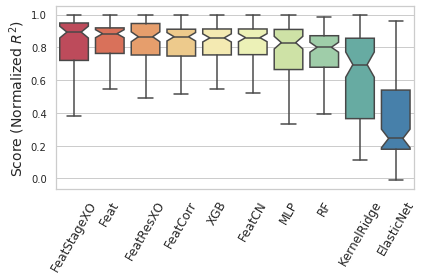

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

# sort Order by median score
medscores = {m:df['r2_score'].median() for m,df in df_reg.groupby('method')}
Order = [s[0] for s in sorted(medscores.items(), key=lambda kv: kv[1])][::-1]
print('Order:',Order)
# plt.figure(figsize=(20,5))
df_reg['norm_r2_score'] = df_reg.groupby('dataset')['r2_score'].transform(lambda x: (x - x.min()) / (x.max() - x.min()))
df_sum=pd.DataFrame()#columns=['dataset','method','med_score'])
df_sum['med_r2_score'] = df_reg.groupby(['dataset','method'])['r2_score'].median().drop_duplicates()
df_sum['norm_r2_score'] = df_reg.groupby(['dataset','method'])['norm_r2_score'].median().drop_duplicates()

df_sum['count'] = df_reg.groupby(['dataset','method'])['r2_score'].count()
# print(df_sum[:10])
df_sum=df_sum.reset_index(level=['dataset', 'method'])
# df_sum=df_sum.unstack(level=-1)
# print(df_sum)
# plt.figure()
# sns.barplot(data=df_sum,y='count',x='dataset',hue='method')
# plt.show()
# sns.boxplot(data=df_sum,x='method')
# sns.boxplot(data=df_sum,y='med_score',x='method',notch=True,showfliers=False, 
#             order=['LexNSGA2','MLP','Lex','NSGA2','SimAnneal','ElasticNet',  'Random'],palette='Spectral')
# for d,df_g in df_reg.groupby('dataset'):
#     h = plt.figure()
sns.set_style('whitegrid')
sns.boxplot(data=df_sum,y='med_r2_score',x='method',notch=True,showfliers=False, 
             palette='Spectral',
            order=Order)
#             order=['RF','KernelRidge','','CN','Corr','SXO','CNSXO','CorrSXO'])
#             order=['RF','KernelRidge','MLP'])

# plt.title(d)
# plt.ylim([-1,1])
plt.yticks(np.linspace(0.0,1.0,6))
plt.xticks(rotation=60,size=12)
plt.yticks(size=10)
plt.ylabel('Score (Normalized $R^2$)',size=14)
plt.xlabel('')
# plt.xlabel('Algorithm',size=14)
plt.tight_layout()
plt.savefig('../../paper/figs/all_variants_boxplot_r2_score.pdf')

print('method','median','mean','std')
for m,df in df_reg.groupby('method'):
    print(m,df['r2_score'].median(),df['r2_score'].mean(),df['r2_score'].std())

## size comparison

10
1
Order: ['ElasticNet', 'KernelRidge', 'FeatCorr', 'Feat', 'FeatCN', 'FeatResXO', 'FeatStageXO', 'MLP', 'XGB', 'RF']


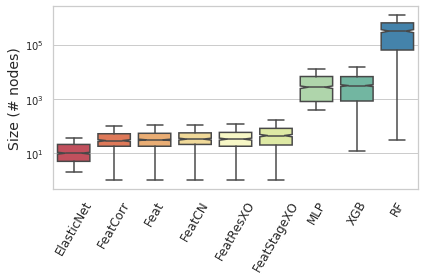

In [76]:
pal = sns.color_palette('Spectral',n_colors=len(Order))
print(len(pal))

for i,o in reversed(list(enumerate(Order))):
    if o == 'KernelRidge':
        print(i)
        del pal[i]
        
medsizes = {m:df['size'].median() for m,df in df_reg.groupby('method')}
Order = [s[0] for s in sorted(medsizes.items(), key=lambda kv: kv[1])]
print('Order:',Order)
# plt.figure(figsize=(20,5))
# df_data['real_name'] = [str(did).strip()+'_'+name 
#                         for did,name in zip(df_data['did'].values,df_data['name'].values)]
# size_dict = df_data.set_index('real_name').loc[:,'NumberOfInstances'].to_dict()
# print(size_dict)
# df_reg['dataset_size'] = df_reg['dataset'].apply(lambda x: int(size_dict[x]))
df_reg.loc[df_reg['method']=='MLP','size'] = df_reg.loc[df_reg['method']=='MLP']['num_params'] 
df_reg['size'] = df_reg['size'].apply(pd.to_numeric)

sns.boxplot(data=df_reg,y='size',x='method',notch=True,showfliers=False,palette='Spectral',
            order=[o for o in Order if o != 'KernelRidge'])
# plt.ylim([-1,1])
plt.xticks(rotation=60,size=12)
plt.yticks(size=10)
plt.ylabel('Size (# nodes)',size=14)
plt.xlabel('')
plt.gca().set_yscale('log')

plt.tight_layout()
plt.savefig('../../paper/figs/all_boxplot_size.pdf')

7
{'ElasticNet': 0.1620805853816503, 'Feat': 0.5853855918651195, 'FeatCN': 0.5491997658676053, 'FeatCorr': 0.5606392015041465, 'FeatResXO': 0.6462881593037315, 'FeatStageXO': 0.7401228492449548, 'KernelRidge': 0.1620805853816503, 'MLP': 0.46881470195788055, 'RF': 0.0, 'XGB': 0.1620805853816503}
Order: ['RF', 'ElasticNet', 'KernelRidge', 'XGB', 'MLP', 'FeatCN', 'FeatCorr', 'Feat', 'FeatResXO', 'FeatStageXO']
['FeatCN' 'FeatCorr' 'Feat' 'KernelRidge' 'ElasticNet' 'MLP' 'RF' 'XGB'
 'FeatResXO' 'FeatStageXO']
['ElasticNet' 'Feat' 'FeatCN' 'FeatCorr' 'FeatResXO' 'FeatStageXO'
 'KernelRidge' 'MLP' 'RF' 'XGB']
['ElasticNet' 'Feat' 'FeatCN' 'FeatCorr' 'FeatResXO' 'FeatStageXO'
 'KernelRidge' 'MLP' 'RF' 'XGB']
['ElasticNet' 'Feat' 'FeatCN' 'FeatCorr' 'FeatResXO' 'FeatStageXO'
 'KernelRidge' 'MLP' 'RF' 'XGB']


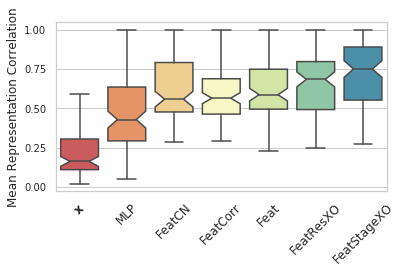

In [87]:
## correlation comparison
pal = sns.color_palette('Spectral',n_colors=7)
print(len(pal))

medcorrs = {m:df['corr'].median() for m,df in df_reg.groupby('method')}
print(medcorrs)
Order = [s[0] for s in sorted(medcorrs.items(), key=lambda kv: kv[1])]
print('Order:',Order)
# for i,o in reversed(list(enumerate(Order))):
#     if o not in ['Feat','FeatCorr','FeatCN','MLP','ElasticNet']:
#         print(i)
#         del pal[i]
        
df_reg['norm_corr'] = df_reg.groupby('dataset')['corr'].transform(lambda x: (x - x.min()) / (x.max() - x.min())).apply(lambda x: x if not np.isnan(x) else 1.0)
print(df_reg.method.unique())
df_sum=pd.DataFrame()#columns=['dataset','method','med_score'])
df_sum['med_corr'] = df_reg.groupby(['dataset','method'])['corr'].median()
df_sum=df_sum.reset_index(level=['dataset', 'method'])
print(df_sum.method.unique())
df_sum.drop_duplicates(inplace=True)
print(df_sum.method.unique())
#df_sum['norm_corr'] = df_reg.groupby(['dataset','method'])['norm_corr'].median().drop_duplicates()
# df_sum=df_sum.reset_index(level=['dataset', 'method'])
print(df_sum.method.unique())
# sns.set_palette(pal)
h = plt.figure()
df_sum.loc[df_sum.method=='ElasticNet','method'] = '$\mathbf{x}$'
sns.set(font_scale=1.7)
sns.set_style('whitegrid')
sns.boxplot(data=df_sum,y='med_corr',x='method',notch=True,showfliers=False,
        palette=pal,order=['$\mathbf{x}$']
            +[o for o in Order if o not in ['RF','ElasticNet','XGB','KernelRidge']])
# , order=['Feat','FeatCorr','FeatCN','MLP','Baseline'])
#             ,order=[o for o in Order if o not in ['RF']])
#         order=['','SXO','CN','Corr','CNSXO','CorrSXO'])
# plt.title(d)
plt.ylabel('Mean Representation Correlation',size=12)
plt.xlabel('')
plt.xticks(rotation=45,size=12)
plt.yticks([0,0.25,0.5,0.75,1.0],size=10)
plt.tight_layout()
plt.savefig('../../paper/figs/all_boxplot_corr.pdf')